### FashionMNIST classifier based on Random Forest

-FashionMNIST is a dataset of grayscale images of 28x28 pixels representing 10 categories of clothing items.

-This notebook uses Random Forest to classify the ten categories of FashionMNIST.

### 运行说明：
### 该笔记需要python环境，环境中需确保有numpy  sklearn  matplotlib  torchvision库

==============================================================================================================================================================

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
import time

In [2]:
# 数据准备
def load_fashion_mnist():
    # 加载数据集
    train_dataset = FashionMNIST(root='fmnist_data/', train=True, download=True)
    test_dataset = FashionMNIST(root='fmnist_data/', train=False, download=True)
    
    # 转换为numpy数组
    X_train = train_dataset.data.numpy().reshape(-1, 28*28)
    y_train = train_dataset.targets.numpy()
    X_test = test_dataset.data.numpy().reshape(-1, 28*28)
    y_test = test_dataset.targets.numpy()
    
    # 特征缩放
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# 加载数据
X_train, X_test, y_train, y_test = load_fashion_mnist()
print("训练数据形状:", X_train.shape)
print("测试数据形状:", X_test.shape)

# 类别名称
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

训练数据形状: (60000, 784)
测试数据形状: (10000, 784)


In [3]:
# 训练随机森林模型
def train_random_forest():
    # 创建随机森林分类器
    rf = RandomForestClassifier(
        n_estimators=100,        # 树的数量
        max_depth=20,            # 树的最大深度
        min_samples_split=5,     # 分裂节点所需的最小样本数
        min_samples_leaf=2,      # 叶节点所需的最小样本数
        random_state=42          # 随机种子
    )
    
    # 训练模型
    print("开始训练随机森林模型...")
    start_time = time.time()
    rf.fit(X_train, y_train)
    training_time = time.time() - start_time
    print(f"训练完成！用时: {training_time:.2f} 秒")
    
    return rf

# 评估模型
def evaluate_random_forest(model):
    # 在测试集上预测
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\n模型评估结果:")
    print(f"准确率: {accuracy:.4f}")
    print(f"预测用时: {prediction_time:.2f} 秒")
    print("\n详细分类报告:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    return y_pred

In [4]:
# 特征重要性分析
def plot_feature_importance(model):
    # 获取特征重要性
    importances = model.feature_importances_
    
    # 选择前20个最重要的特征
    top_n = 20
    indices = np.argsort(importances)[::-1][:top_n]
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 20 Most Important Features')
    plt.bar(range(top_n), importances[indices])
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.tight_layout()
    plt.show()

# 混淆矩阵可视化
def plot_confusion_matrix(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

开始训练随机森林模型...
训练完成！用时: 59.30 秒

模型评估结果:
准确率: 0.8759
预测用时: 0.30 秒

详细分类报告:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.76      0.82      0.79      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.72      0.59      0.65      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



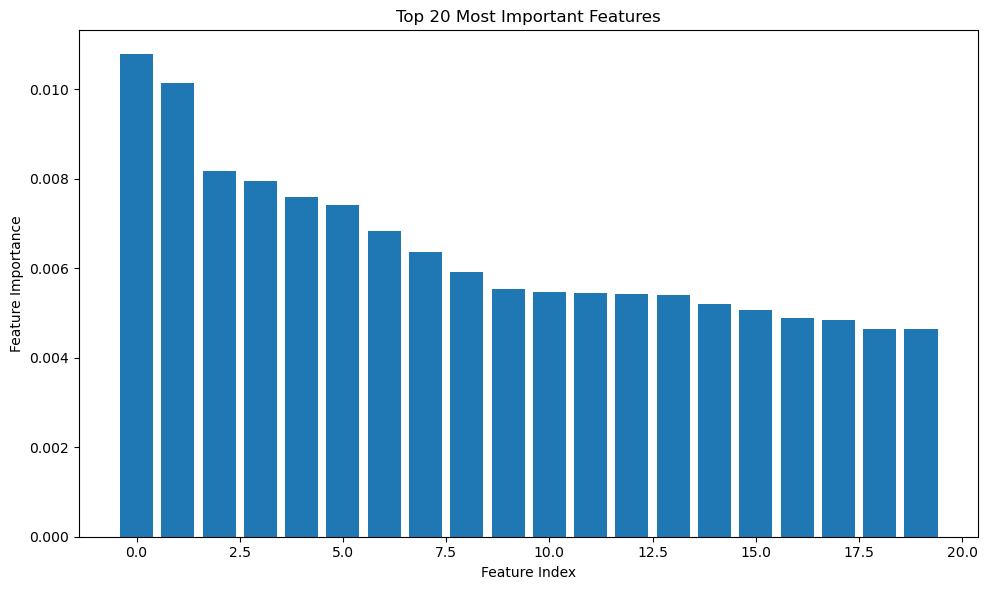

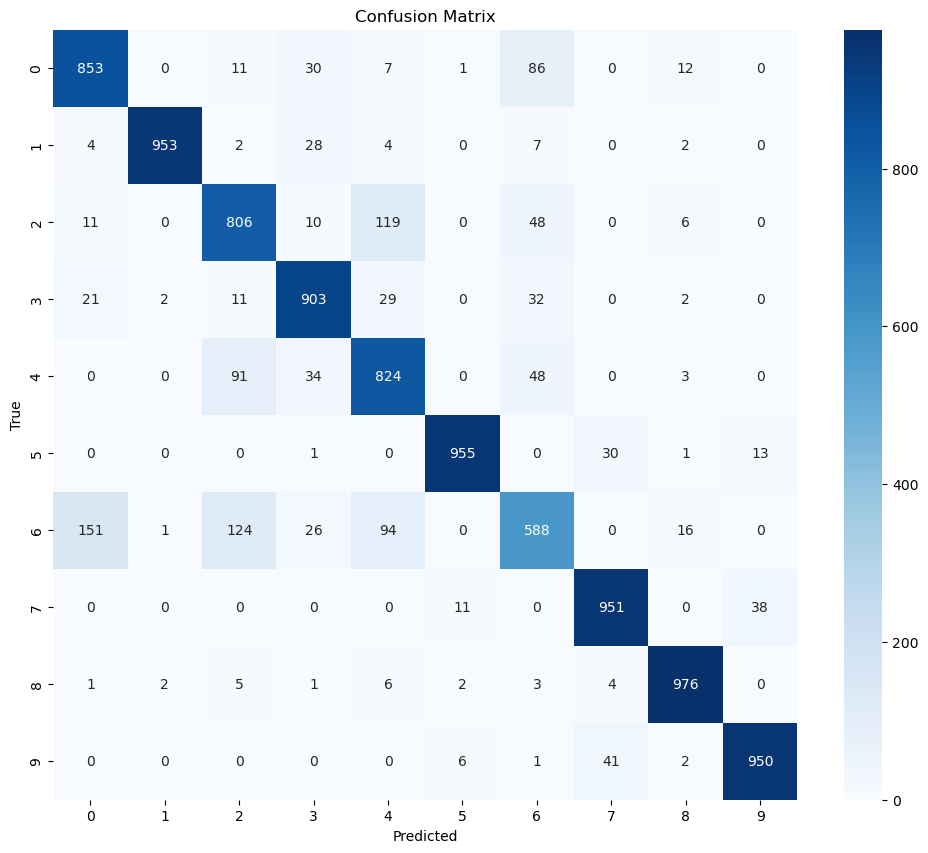

In [5]:
if __name__ == "__main__":
    # 训练模型
    rf_model = train_random_forest()
    
    # 评估模型
    y_pred = evaluate_random_forest(rf_model)
    
    # 绘制特征重要性
    plot_feature_importance(rf_model)
    
    # 绘制混淆矩阵
    plot_confusion_matrix(y_test, y_pred)